# Harga Harap Posisi Atom Hidrogen

Sebuah atom hidrogen H memiliki elektron yang tereksitasi pada orbital 4f dengan $n=4$ dan $l=3$.

Di bawah ini adalah program untuk menentukan harga harap langsung $\bar{r}$, harga harap $r_{rms}$, nilai $r$ maksimum $r_m$, dan harga harap harmonik $r_h$.

In [5]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [8]:
def integrate(r, to_integrate):

  xmin = min(r)
  h = 0.5
  dx = 1
  result = 0

  for i in range(len(r)-2):
    result = result + (to_integrate[i] + 4*to_integrate[i+1] + to_integrate[i+2])
    xmin = xmin + dx 
    
  result = result * h/3

  return result

In [18]:
#Import data

data = np.loadtxt('uas43.out')
r = [] #Position
R = [] #Radial position
rR = [] #Wavefunction

for i in range(0, len(data)):
	r.append(data[i][0])
	R.append(data[i][1])
	rR.append(data[i][2])

rrR2 =[]
rms = []
rr = []
rh = []

for i in range(0, len(r)):
	rrR2.append(r[i]*(rR[i])**2)
	rr.append((rR[i])**2)
	rms.append((r[i]**2) * (rR[i]**2))
	rh.append((1/r[i]) * (rR[i]**2))

#Integration
r1 = integrate(r, rrR2)
r2 = integrate(r, rr)
Rms = integrate(r, rms)
rH = integrate(r, rh)

#Normalized
r_norm = r1/r2
rms_norm = np.sqrt((Rms/r2))
rh_norm = (rH/r2)**-1
max_P = rR.index(max(rR))
rm = r[max_P]

print("Harga harap langsung: ", r_norm)
print("Harga harap rms: ", rms_norm)
print("Harga harap harmonik: ", rh_norm)
print("Nilai r maksimum: ", rm)

Harga harap langsung:  15.999999994662932
Harga harap rms:  16.970562738608994
Harga harap harmonik:  14.000000001999494
Nilai r maksimum:  15.958634009794029


In [14]:
#Peluang
rR2 = []
for i in range(len(rR)):
	rR2.append(rR[i]*rR[i])

norm_coeff = np.sqrt(np.sum(rR2))
rR = rR / norm_coeff
P = []

for i in range(len(rR)):
	P.append(rR[i]*rR[i])
 
prob = sum(P)
print("Peluang (0<=x<=100): ", prob)

Peluang (0<=x<=100):  0.9999999999999996


### Grafik Fungsi Gelombang dan Peluang

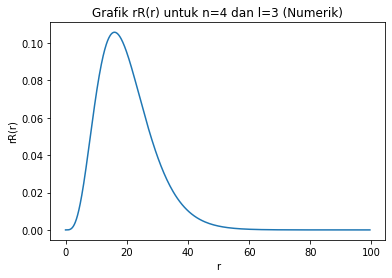

In [16]:
plt.plot(r, rR)
plt.title('Grafik rR(r) untuk n=4 dan l=3 (Numerik)')
plt.xlabel('r')
plt.ylabel('rR(r)')
plt.show()

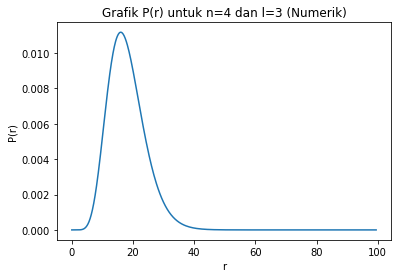

In [17]:
plt.plot(r, P)
plt.title('Grafik P(r) untuk n=4 dan l=3 (Numerik)')
plt.xlabel('r')
plt.ylabel('P(r)')
plt.show()